In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv(r'D:\DOWNLOADS\nse_all_stock_data\nse_all_stock_data.csv')

In [3]:
df['Date']=pd.to_datetime(df['Date'])

In [4]:
df.set_index('Date',inplace=True)

In [5]:
df.interpolate(method='linear', limit_direction='both', inplace=True)

In [6]:
all_nan=df.columns[df.isna().all()].tolist()

In [7]:
df.drop(columns=all_nan,inplace=True)

In [61]:
df

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-02,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,61.805000,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
1991-01-03,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,61.805000,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
1991-01-04,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,61.805000,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
1991-01-07,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,61.805000,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
1991-01-08,14.691803,39.700001,2.980000,25.127272,15.681876,18.823240,0.796679,875.250000,5.583333,61.805000,...,359.149994,94.650002,16.775000,2.502025,69.550003,214.649994,660.000000,73.250000,63.049999,18.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,3120.300049,3978.199951,1705.199951,1211.849976,1454.000000,841.950012,1590.800049,996.349976,429.049988,2505.100098,...,1434.300049,313.850006,220.410004,3.900000,402.799988,134.960007,384.850006,82.779999,211.089996,27.440001
2024-07-02,3130.350098,4017.399902,1730.599976,1190.599976,1418.949951,826.150024,1621.050049,985.450012,425.500000,2485.149902,...,1449.849976,305.649994,216.110001,3.870000,409.799988,130.729996,396.700012,83.349998,211.740005,27.770000
2024-07-03,3104.850098,3965.250000,1768.650024,1201.599976,1419.849976,839.950012,1627.400024,988.200012,428.299988,2510.350098,...,1432.449951,325.399994,227.800003,3.870000,429.350006,132.220001,394.200012,83.269997,225.880005,27.700001


In [8]:
df.describe()

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
count,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,...,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000
mean,514.449205,798.467908,370.662040,200.478944,237.963728,162.518480,363.667404,865.947403,114.127276,648.985285,...,404.852374,94.208986,30.543469,3.187879,122.099600,130.458780,457.892096,73.098919,90.864825,18.353577
std,719.892085,1096.192532,510.729152,249.746368,254.427723,167.137113,457.214964,52.180375,120.799604,794.411915,...,169.162890,31.640616,27.873118,1.968544,124.374999,88.591365,252.429996,3.874613,54.810384,2.230083
min,10.975116,35.474998,2.435000,20.100000,9.350544,13.346102,0.763183,531.849976,4.182222,61.805000,...,233.699997,12.750000,7.100000,0.624703,14.000000,8.900000,51.150002,47.750000,59.349998,12.700000
25%,25.584803,39.700001,7.496250,25.127272,15.681876,21.329467,19.350976,875.250000,14.392500,144.949997,...,359.149994,94.650002,16.775000,2.502025,69.550003,31.350000,149.887505,73.250000,63.049999,18.150000
50%,298.363907,216.287498,99.955002,113.527271,251.631027,110.849632,197.207817,875.250000,58.183334,237.464996,...,359.149994,94.650002,16.775000,2.502025,69.550003,205.699997,660.000000,73.250000,63.049999,18.150000
75%,497.448433,1236.475037,535.462479,256.681824,346.223610,253.587505,496.924988,875.250000,216.283337,851.274994,...,359.149994,94.650002,33.650002,2.609474,117.000000,214.649994,660.000000,73.250000,77.700003,18.150000
max,3177.250000,4219.250000,1768.650024,1233.400024,1475.800049,905.650024,1939.500000,1105.250000,492.149994,2812.449951,...,1556.550049,340.299988,227.800003,17.518017,806.200012,236.149994,660.000000,119.900002,332.000000,52.000000


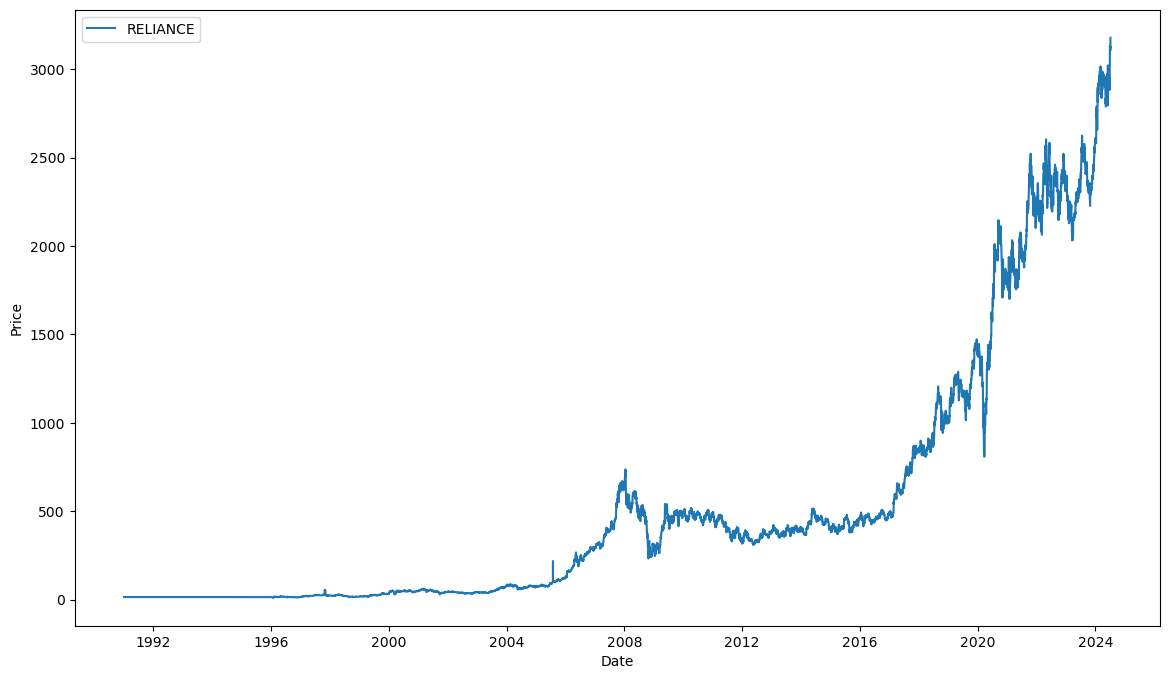

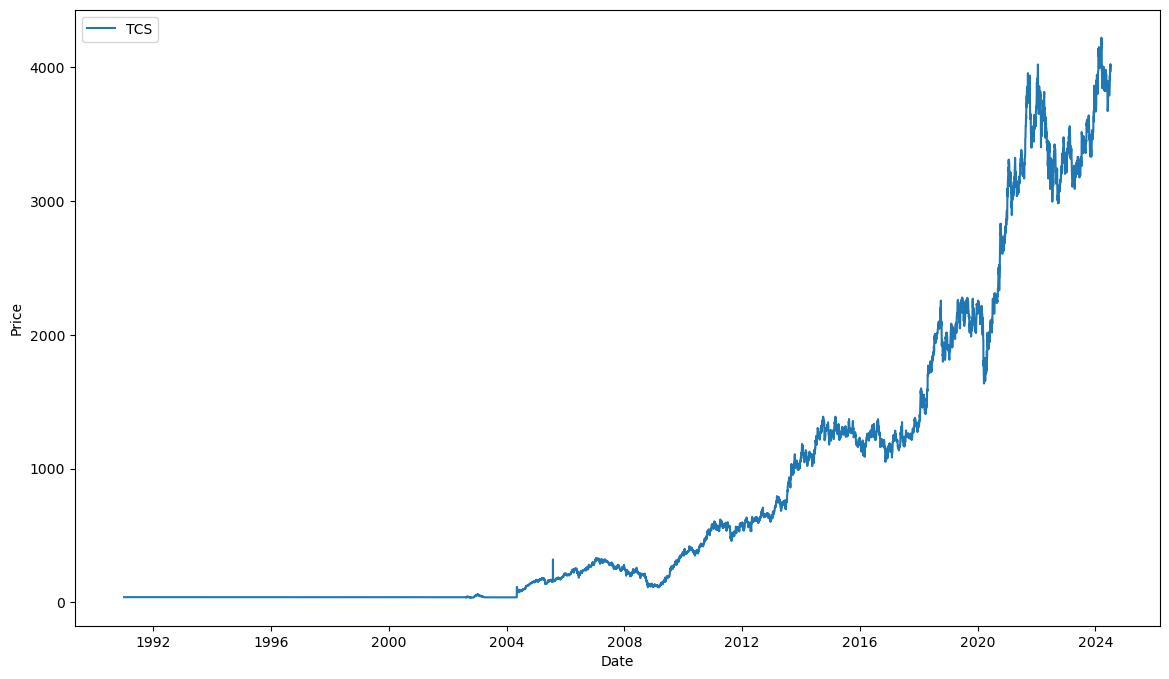

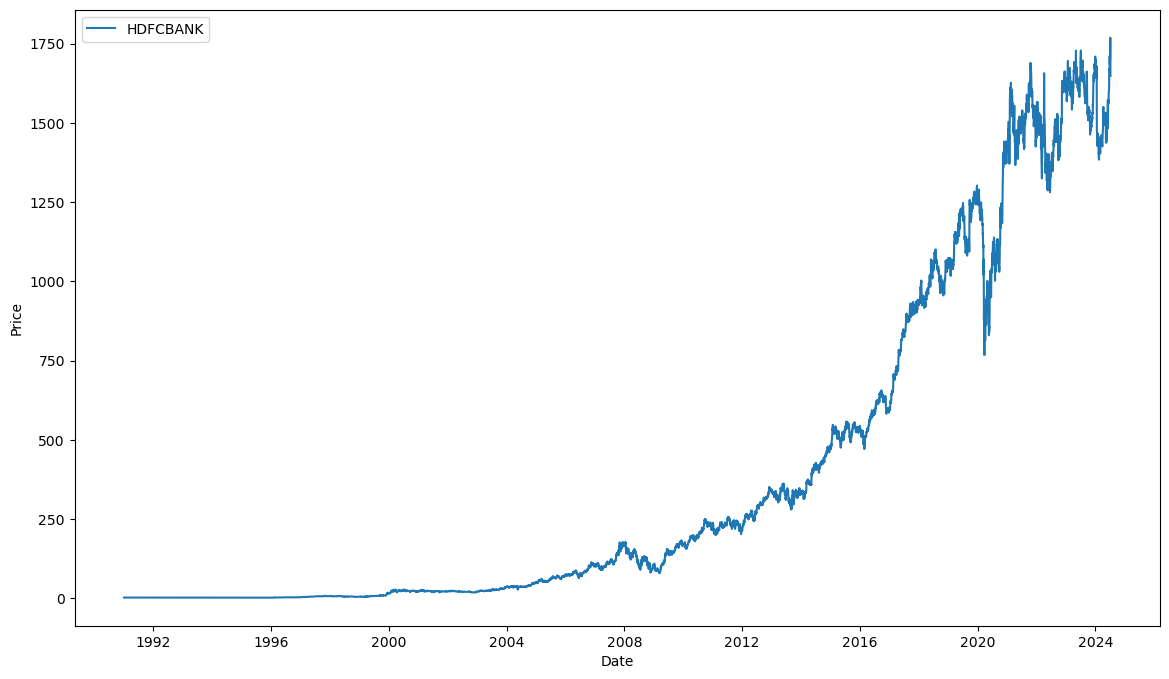

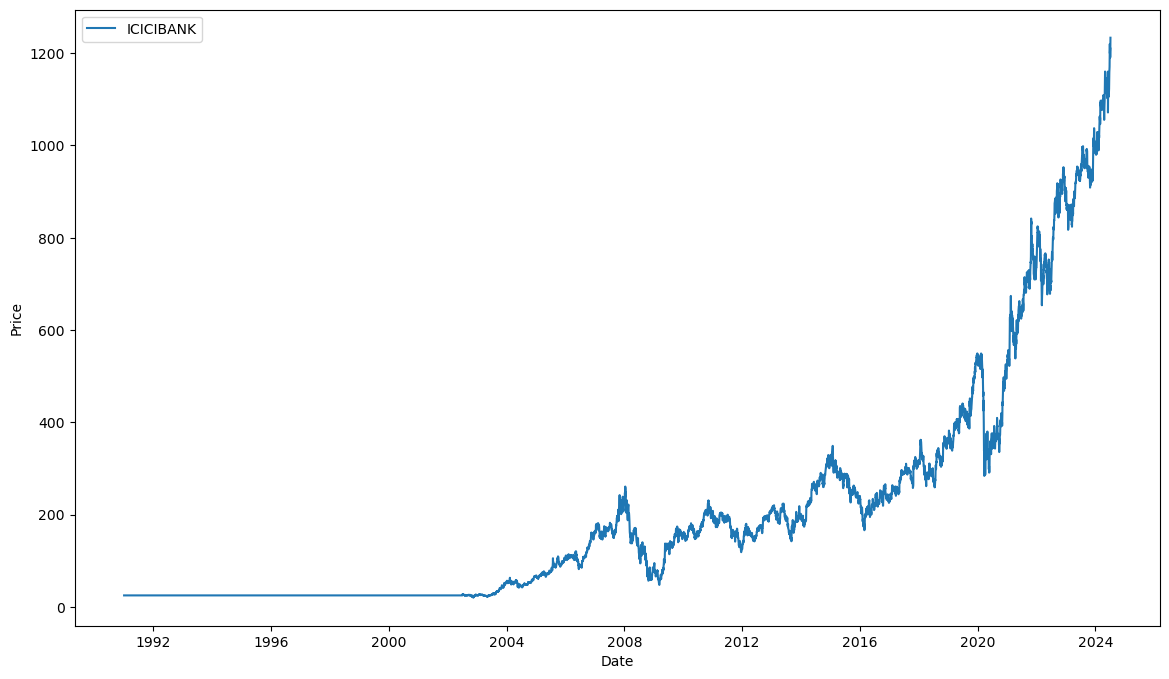

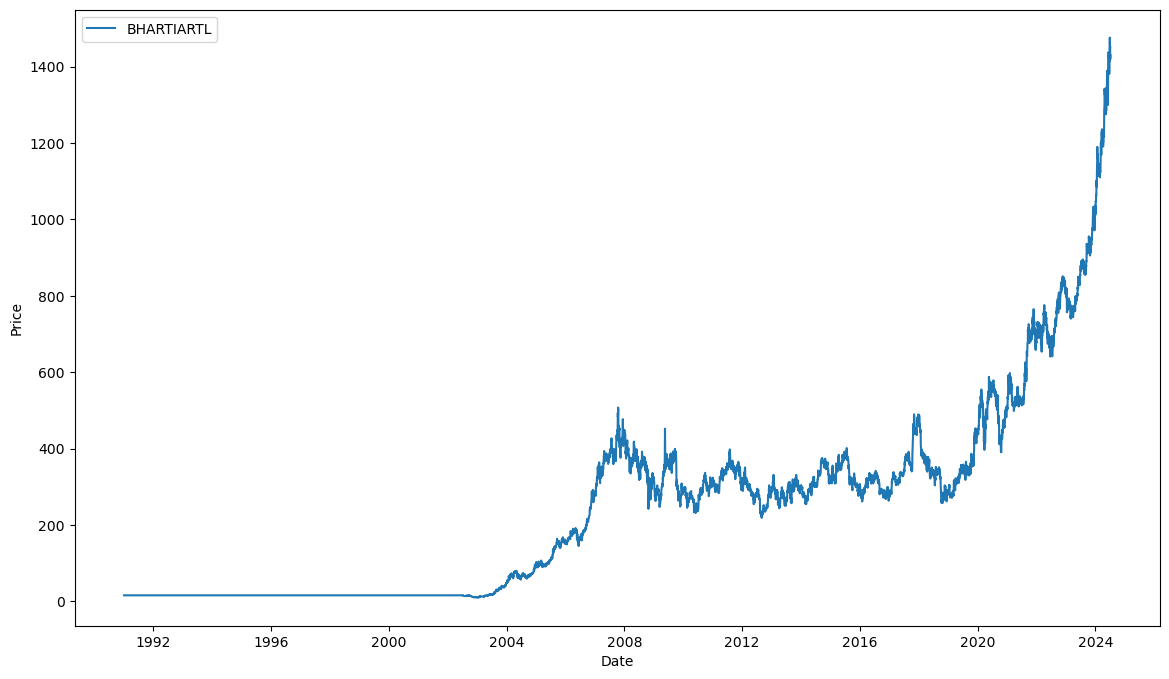

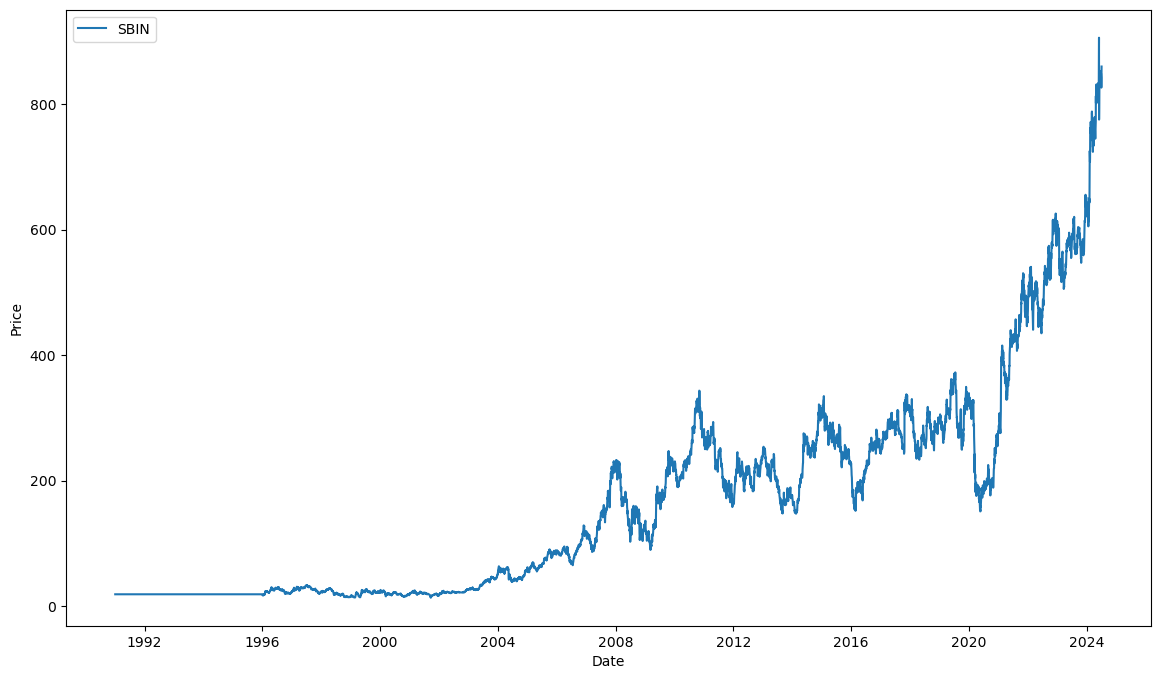

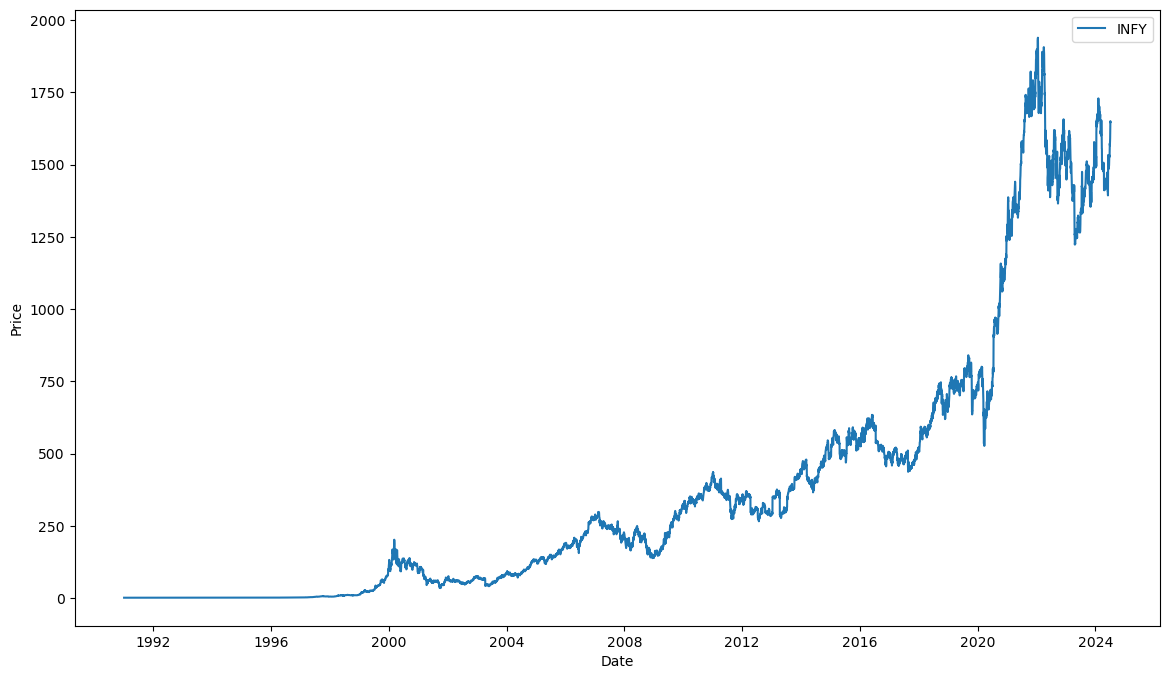

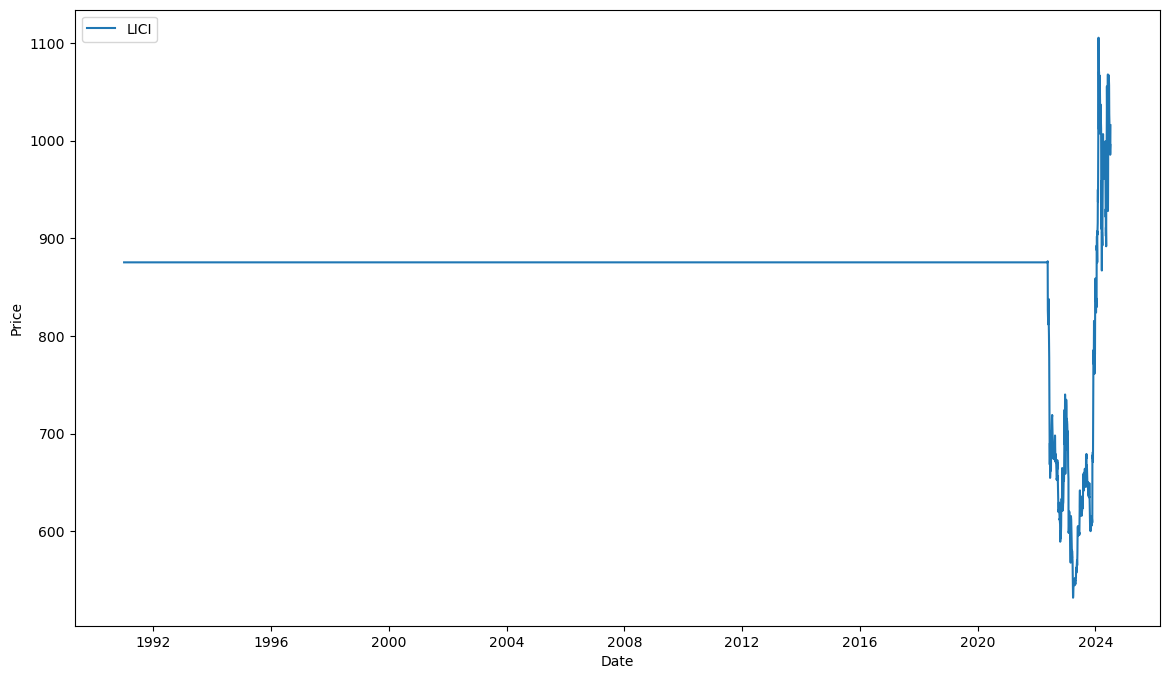

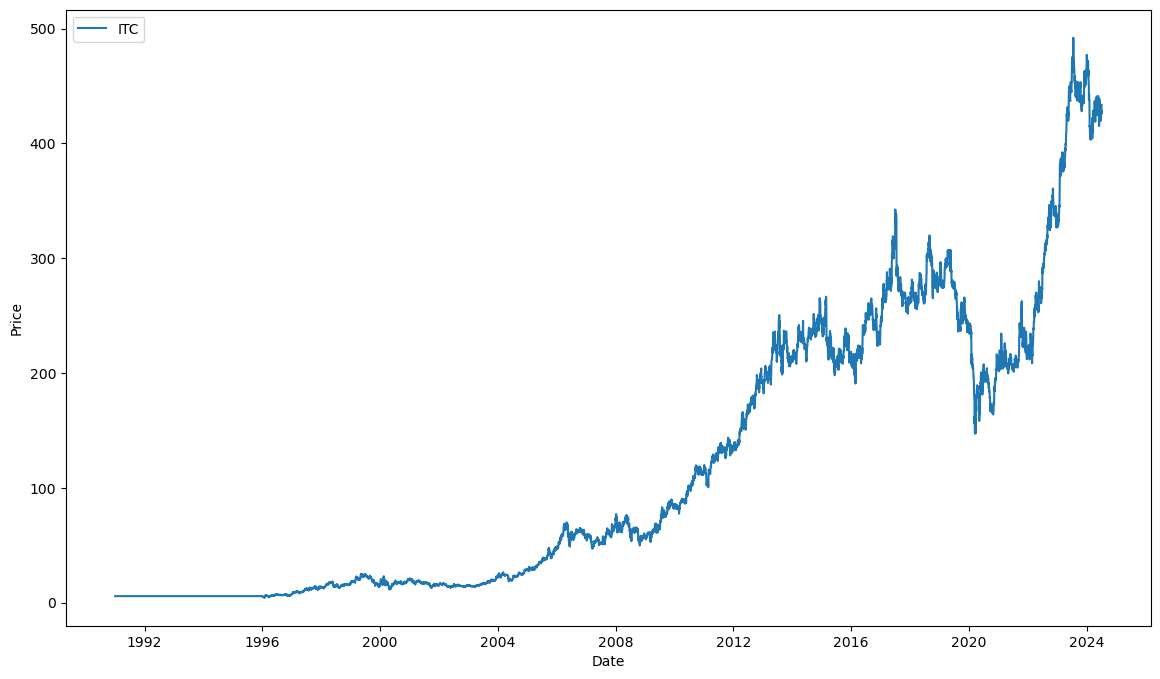

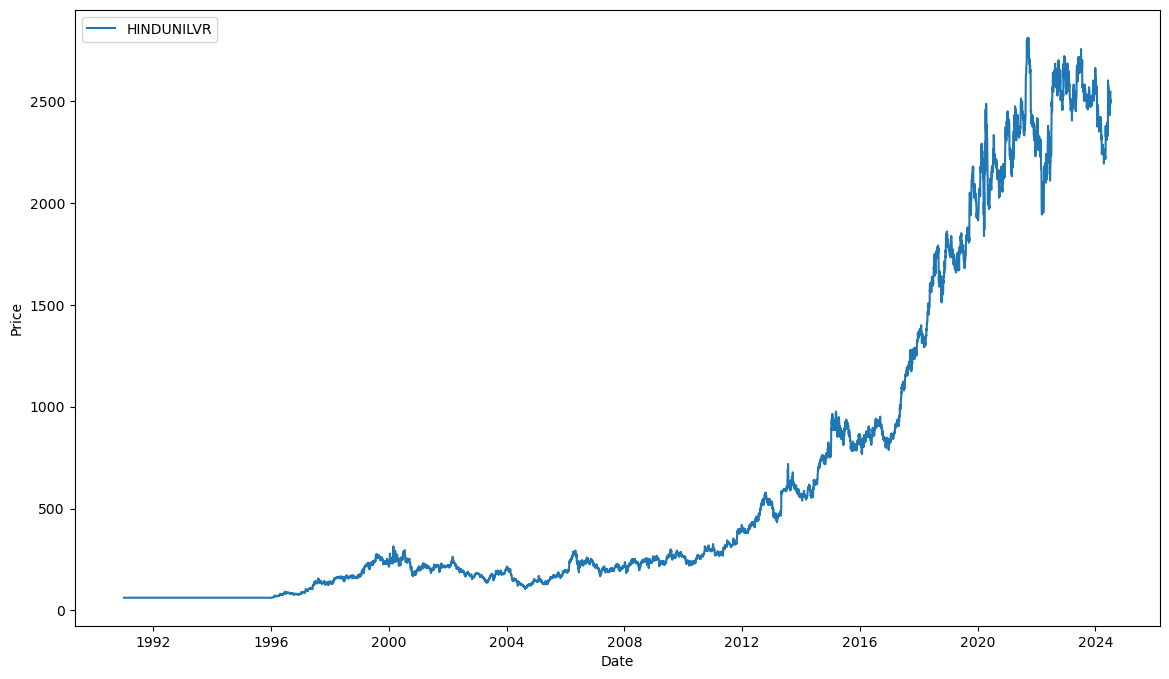

In [9]:
first_10=df.iloc[:,0:10]
for ele in first_10:
    plt.figure(figsize=(14, 8))
    plt.plot(first_10.index,first_10[ele],label=ele)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [10]:
returns=df.pct_change()

In [11]:
returns.dropna(inplace=True)

In [12]:
returns

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991-01-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,-0.003354,0.018967,0.012709,0.010212,0.006890,-0.008245,0.015350,0.007686,0.009767,0.012960,...,0.052504,0.011441,-0.001631,0.012987,0.026111,-0.005746,-0.014847,0.003637,0.002565,-0.019299
2024-07-02,0.003221,0.009854,0.014896,-0.017535,-0.024106,-0.018766,0.019016,-0.010940,-0.008274,-0.007964,...,0.010841,-0.026127,-0.019509,-0.007692,0.017378,-0.031343,0.030791,0.006886,0.003079,0.012026
2024-07-03,-0.008146,-0.012981,0.021987,0.009239,0.000634,0.016704,0.003917,0.002791,0.006580,0.010140,...,-0.012001,0.064616,0.054093,0.000000,0.047706,0.011398,-0.006302,-0.000960,0.066780,-0.002521


In [13]:
correlation=returns.corr()

In [14]:
correlation

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
RELIANCE,1.000000,0.334238,0.312595,0.323234,0.254980,0.378049,0.243245,0.034273,0.298071,0.226872,...,0.066884,0.046660,0.098799,0.044656,0.092787,0.092988,0.087273,0.028643,0.069248,0.015102
TCS,0.334238,1.000000,0.129333,0.198919,0.165895,0.123870,0.208734,0.015928,0.106968,0.114091,...,0.035096,0.024735,0.045823,0.013392,0.039923,0.058163,0.026032,0.019194,0.023215,0.015859
HDFCBANK,0.312595,0.129333,1.000000,0.435351,0.246510,0.453661,0.290200,0.035730,0.319659,0.257799,...,0.073002,0.041619,0.103735,0.037338,0.110969,0.114729,0.085209,0.022436,0.076226,0.014597
ICICIBANK,0.323234,0.198919,0.435351,1.000000,0.358375,0.522027,0.224712,0.029692,0.246360,0.215777,...,0.103079,0.062365,0.177948,0.075737,0.155816,0.172062,0.144409,0.016360,0.120126,0.021056
BHARTIARTL,0.254980,0.165895,0.246510,0.358375,1.000000,0.278031,0.174380,0.036095,0.186853,0.172441,...,0.062747,0.029825,0.115065,0.038369,0.088754,0.094604,0.074941,0.025578,0.067191,0.023976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DONEAR,0.092988,0.058163,0.114729,0.172062,0.094604,0.168352,0.059431,0.079919,0.094439,0.072259,...,0.108140,0.122370,0.177479,0.120318,0.135651,1.000000,0.117174,0.065125,0.158085,0.074368
CAREERP,0.087273,0.026032,0.085209,0.144409,0.074941,0.144654,0.045975,0.054377,0.079600,0.055709,...,0.154158,0.115570,0.145965,0.095555,0.187766,0.117174,1.000000,0.039263,0.143596,0.042122
INTLCONV,0.028643,0.019194,0.022436,0.016360,0.025578,0.042378,0.018437,0.273185,0.028209,0.008739,...,0.087980,0.117012,0.056326,0.108251,0.048190,0.065125,0.039263,1.000000,0.108256,0.145529
SHREEPUSHK,0.069248,0.023215,0.076226,0.120126,0.067191,0.130518,0.049936,0.074041,0.088322,0.051043,...,0.202880,0.180187,0.180176,0.133000,0.163337,0.158085,0.143596,0.108256,1.000000,0.105090


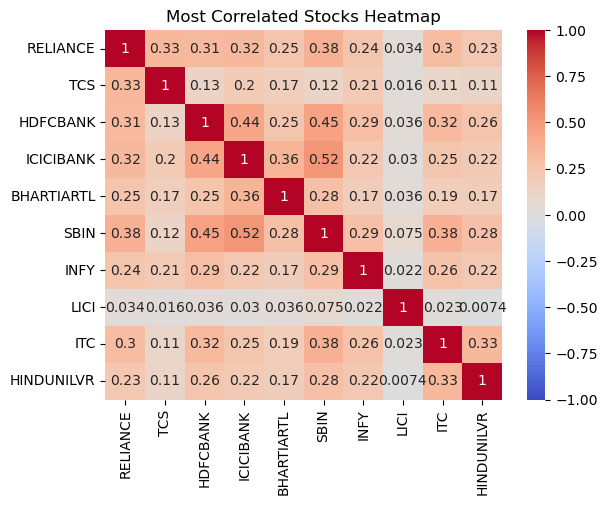

In [15]:
sns.heatmap(correlation.iloc[0:10,0:10],annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Most Correlated Stocks Heatmap')
plt.show()

In [16]:
np.fill_diagonal(correlation.values,np.nan)

In [17]:
correlation

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
RELIANCE,NaN,0.334238,0.312595,0.323234,0.254980,0.378049,0.243245,0.034273,0.298071,0.226872,...,0.066884,0.046660,0.098799,0.044656,0.092787,0.092988,0.087273,0.028643,0.069248,0.015102
TCS,0.334238,NaN,0.129333,0.198919,0.165895,0.123870,0.208734,0.015928,0.106968,0.114091,...,0.035096,0.024735,0.045823,0.013392,0.039923,0.058163,0.026032,0.019194,0.023215,0.015859
HDFCBANK,0.312595,0.129333,NaN,0.435351,0.246510,0.453661,0.290200,0.035730,0.319659,0.257799,...,0.073002,0.041619,0.103735,0.037338,0.110969,0.114729,0.085209,0.022436,0.076226,0.014597
ICICIBANK,0.323234,0.198919,0.435351,NaN,0.358375,0.522027,0.224712,0.029692,0.246360,0.215777,...,0.103079,0.062365,0.177948,0.075737,0.155816,0.172062,0.144409,0.016360,0.120126,0.021056
BHARTIARTL,0.254980,0.165895,0.246510,0.358375,NaN,0.278031,0.174380,0.036095,0.186853,0.172441,...,0.062747,0.029825,0.115065,0.038369,0.088754,0.094604,0.074941,0.025578,0.067191,0.023976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DONEAR,0.092988,0.058163,0.114729,0.172062,0.094604,0.168352,0.059431,0.079919,0.094439,0.072259,...,0.108140,0.122370,0.177479,0.120318,0.135651,NaN,0.117174,0.065125,0.158085,0.074368
CAREERP,0.087273,0.026032,0.085209,0.144409,0.074941,0.144654,0.045975,0.054377,0.079600,0.055709,...,0.154158,0.115570,0.145965,0.095555,0.187766,0.117174,NaN,0.039263,0.143596,0.042122
INTLCONV,0.028643,0.019194,0.022436,0.016360,0.025578,0.042378,0.018437,0.273185,0.028209,0.008739,...,0.087980,0.117012,0.056326,0.108251,0.048190,0.065125,0.039263,NaN,0.108256,0.145529
SHREEPUSHK,0.069248,0.023215,0.076226,0.120126,0.067191,0.130518,0.049936,0.074041,0.088322,0.051043,...,0.202880,0.180187,0.180176,0.133000,0.163337,0.158085,0.143596,0.108256,NaN,0.105090


In [18]:
max_indices=correlation.idxmax()

In [19]:
max_values=correlation.max()

In [20]:
mostCorrelated=pd.DataFrame()

In [21]:
mostCorrelated=max_indices.reset_index()

In [22]:
mostCorrelated.rename(columns={'index':'stock1',0:'stock2'})

,stock1,stock2
0,RELIANCE,GAIL
1,TCS,SRF
2,HDFCBANK,SBIN
3,ICICIBANK,AXISBANK
4,BHARTIARTL,ICICIBANK
...,...,...
1385,DONEAR,NELCAST
1386,CAREERP,ADANIPOWER
1387,INTLCONV,SHYAMMETL
1388,SHREEPUSHK,BHAGERIA


In [23]:
mostCorrelated['Correlation']=max_values.values

In [24]:
mostCorrelated

,index,0,Correlation
0,RELIANCE,GAIL,0.564732
1,TCS,SRF,0.431011
2,HDFCBANK,SBIN,0.453661
3,ICICIBANK,AXISBANK,0.526336
4,BHARTIARTL,ICICIBANK,0.358375
...,...,...,...
1385,DONEAR,NELCAST,0.251557
1386,CAREERP,ADANIPOWER,0.242261
1387,INTLCONV,SHYAMMETL,0.297458
1388,SHREEPUSHK,BHAGERIA,0.319180


In [25]:
mostCorrelated.rename(columns={'index':'stock1',0:'stock2'},inplace=True)

In [26]:
mostCorrelated

,stock1,stock2,Correlation
0,RELIANCE,GAIL,0.564732
1,TCS,SRF,0.431011
2,HDFCBANK,SBIN,0.453661
3,ICICIBANK,AXISBANK,0.526336
4,BHARTIARTL,ICICIBANK,0.358375
...,...,...,...
1385,DONEAR,NELCAST,0.251557
1386,CAREERP,ADANIPOWER,0.242261
1387,INTLCONV,SHYAMMETL,0.297458
1388,SHREEPUSHK,BHAGERIA,0.319180


In [27]:
df['TATAMOTORS']

Date
1991-01-02      21.857864
1991-01-03      21.857864
1991-01-04      21.857864
1991-01-07      21.109308
1991-01-08      21.109308
                 ...     
2024-07-01    1002.049988
2024-07-02     981.299988
2024-07-03     975.650024
2024-07-04     998.200012
2024-07-05     993.650024
Name: TATAMOTORS, Length: 8470, dtype: float64

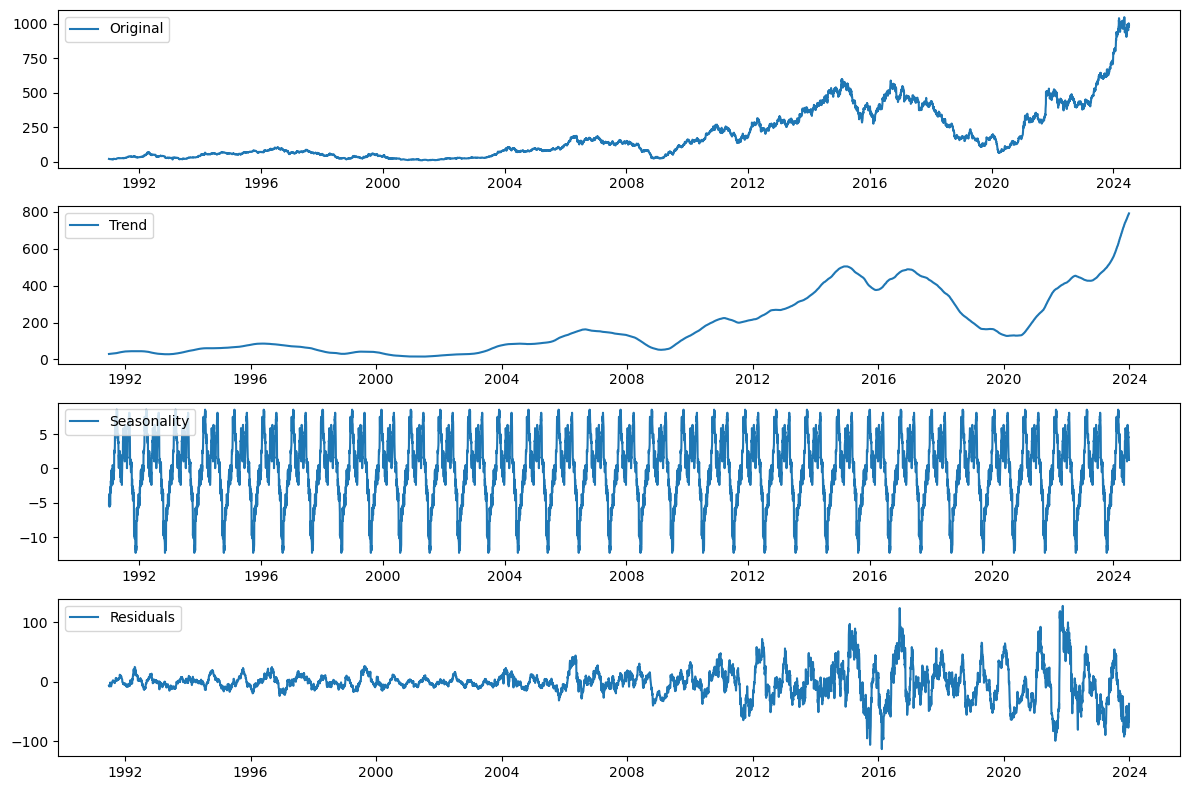

In [28]:
decomposition = seasonal_decompose(df['TATAMOTORS'], model='additive', period=252)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['TATAMOTORS'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [29]:
def calculate_rolling_metrics(stock_series, window=20):
    rolling_mean = stock_series.rolling(window=window).mean()
    rolling_std = stock_series.rolling(window=window).std()
    return rolling_mean,rolling_std

In [30]:
multiIndex=pd.MultiIndex.from_product([df.columns,['Price','rolling_mean','rolling_std']],names=['Stocks','Metrics'])
stock_metrics=pd.DataFrame(index=df.index,columns=multiIndex)
stock_metrics

Stocks     RELIANCE                            TCS                           \
Metrics       Price rolling_mean rolling_std Price rolling_mean rolling_std   
Date                                                                          
1991-01-02      NaN          NaN         NaN   NaN          NaN         NaN   
1991-01-03      NaN          NaN         NaN   NaN          NaN         NaN   
1991-01-04      NaN          NaN         NaN   NaN          NaN         NaN   
1991-01-07      NaN          NaN         NaN   NaN          NaN         NaN   
1991-01-08      NaN          NaN         NaN   NaN          NaN         NaN   
...             ...          ...         ...   ...          ...         ...   
2024-07-01      NaN          NaN         NaN   NaN          NaN         NaN   
2024-07-02      NaN          NaN         NaN   NaN          NaN         NaN   
2024-07-03      NaN          NaN         NaN   NaN          NaN         NaN   
2024-07-04      NaN          NaN         NaN   NaN          NaN         NaN   
2024-07-05      NaN          NaN         NaN   NaN          NaN         NaN   

Stocks     HDFCBANK                          ICICIBANK  ...     CAREERP  \
Metrics       Price rolling_mean rolling_std     Price  ... rolling_std   
Date                                                    ...               
1991-01-02      NaN          NaN         NaN       NaN  ...         NaN   
1991-01-03      NaN          NaN         NaN       NaN  ...         NaN   
1991-01-04      NaN          NaN         NaN       NaN  ...         NaN   
1991-01-07      NaN          NaN         NaN       NaN  ...         NaN   
1991-01-08      NaN          NaN         NaN       NaN  ...         NaN   
...             ...          ...         ...       ...  ...         ...   
2024-07-01      NaN          NaN         NaN       NaN  ...         NaN   
2024-07-02      NaN          NaN         NaN       NaN  ...         NaN   
2024-07-03      NaN          NaN         NaN       NaN  ...         NaN   
2024-07-04      NaN          NaN         NaN       NaN  ...         NaN   
2024-07-05      NaN          NaN         NaN       NaN  ...         NaN   

Stocks     INTLCONV                          SHREEPUSHK               \
Metrics       Price rolling_mean rolling_std      Price rolling_mean   
Date                                                                   
1991-01-02      NaN          NaN         NaN        NaN          NaN   
1991-01-03      NaN          NaN         NaN        NaN          NaN   
1991-01-04      NaN          NaN         NaN        NaN          NaN   
1991-01-07      NaN          NaN         NaN        NaN          NaN   
1991-01-08      NaN          NaN         NaN        NaN          NaN   
...             ...          ...         ...        ...          ...   
2024-07-01      NaN          NaN         NaN        NaN          NaN   
2024-07-02      NaN          NaN         NaN        NaN          NaN   
2024-07-03      NaN          NaN         NaN        NaN          NaN   
2024-07-04      NaN          NaN         NaN        NaN          NaN   
2024-07-05      NaN          NaN         NaN        NaN          NaN   

Stocks                 PRITIKAUTO                           
Metrics    rolling_std      Price rolling_mean rolling_std  
Date                                                        
1991-01-02         NaN        NaN          NaN         NaN  
1991-01-03         NaN        NaN          NaN         NaN  
1991-01-04         NaN        NaN          NaN         NaN  
1991-01-07         NaN        NaN          NaN         NaN  
1991-01-08         NaN        NaN          NaN         NaN  
...                ...        ...          ...         ...  
2024-07-01         NaN        NaN          NaN         NaN  
2024-07-02         NaN        NaN          NaN         NaN  
2024-07-03         NaN        NaN          NaN         NaN  
2024-07-04         NaN        NaN          NaN         NaN  
2024-07-05         NaN        NaN       

In [31]:
for col in df.columns:
    stock_metrics[(col,'Price')]=df[col]
    res=calculate_rolling_metrics(df[col])
    stock_metrics[(col,'rolling_mean')]=res[0]
    stock_metrics[(col,'rolling_std')]=res[1]

In [32]:
stock_metrics

Stocks         RELIANCE                                   TCS               \
Metrics           Price rolling_mean rolling_std        Price rolling_mean   
Date                                                                         
1991-01-02    14.691803          NaN         NaN    39.700001          NaN   
1991-01-03    14.691803          NaN         NaN    39.700001          NaN   
1991-01-04    14.691803          NaN         NaN    39.700001          NaN   
1991-01-07    14.691803          NaN         NaN    39.700001          NaN   
1991-01-08    14.691803          NaN         NaN    39.700001          NaN   
...                 ...          ...         ...          ...          ...   
2024-07-01  3120.300049  2949.742505   85.907552  3978.199951  3834.184985   
2024-07-02  3130.350098  2955.227515   93.811564  4017.399902  3849.912476   
2024-07-03  3104.850098  2970.742517   91.469565  3965.250000  3862.424976   
2024-07-04  3108.050049  2984.070020   91.065109  4020.949951  3876.149976   
2024-07-05  3177.250000  2999.772522   96.065161  4011.800049  3885.219983   

Stocks                     HDFCBANK                             ICICIBANK  \
Metrics    rolling_std        Price rolling_mean rolling_std        Price   
Date                                                                        
1991-01-02         NaN     2.980000          NaN         NaN    25.127272   
1991-01-03         NaN     2.980000          NaN         NaN    25.127272   
1991-01-04         NaN     2.980000          NaN         NaN    25.127272   
1991-01-07         NaN     2.980000          NaN         NaN    25.127272   
1991-01-08         NaN     2.980000          NaN         NaN    25.127272   
...                ...          ...          ...         ...          ...   
2024-07-01   67.353408  1705.199951  1619.462506   66.138103  1211.849976   
2024-07-02   71.658887  1730.599976  1627.382507   69.575398  1190.599976   
2024-07-03   68.646708  1768.650024  1641.657507   67.688129  1201.599976   
2024-07-04   71.615747  1727.150024  1650.425006   66.786857  1233.000000   
2024-07-05   76.814904  1648.099976  1654.845007   63.300803  1233.400024   

Stocks      ...     CAREERP   INTLCONV                           SHREEPUSHK  \
Metrics     ... rolling_std      Price rolling_mean rolling_std       Price   
Date        ...                                                               
1991-01-02  ...         NaN  73.250000          NaN         NaN   63.049999   
1991-01-03  ...         NaN  73.250000          NaN         NaN   63.049999   
1991-01-04  ...         NaN  73.250000          NaN         NaN   63.049999   
1991-01-07  ...         NaN  73.250000          NaN         NaN   63.049999   
1991-01-08  ...         NaN  73.250000          NaN         NaN   63.049999   
...         ...         ...        ...          ...         ...         ...   
2024-07-01  ...   15.415365  82.779999    81.309501    3.108031  211.089996   
2024-07-02  ...   15.568219  83.349998    81.532000    3.085664  211.740005   
2024-07-03  ...   15.488348  83.269997    81.980500    2.591493  225.880005   
2024-07-04  ...   14.852820  82.980003    82.404500    1.906312  223.800003   
2024-07-05  ...   14.857880  84.099998    82.674500    1.728094  241.740005   

Stocks                              PRITIKAUTO                           
Metrics    rolling_mean rolling_std      Price rolling_mean rolling_std  
Date                                                                     
1991-01-02          NaN         NaN  18.150000          NaN         NaN  
1991-01-03          NaN         NaN  18.150000          NaN         NaN  
1991-01-04          NaN         NaN  18.150000          NaN         NaN  
1991-01-07          NaN         NaN  18.150000          NaN         NaN  
1991-01-08          NaN         NaN  18.150000          NaN         NaN  
...                 ...         ...        ...          ...         ...  
2024-07-01   197.400502   18.119322  27.440001      27.

In [33]:
anomalies=pd.DataFrame(index=df.index,columns=df.columns)

In [34]:
def calculateZscore(ele):
    if pd.notna(ele['rolling_std']):
      return (ele['Price']-ele['rolling_mean'])/(ele['rolling_std'])
    else:
        return np.nan

In [35]:
threshold=2
for cols in stock_metrics.columns.get_level_values(0).unique():
    zscore=stock_metrics[cols].apply(calculateZscore,axis=1)
    anomalies[cols]=zscore

C:\Users\amank\AppData\Local\Temp\ipykernel_25448\2174099830.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return (ele['Price']-ele['rolling_mean'])/(ele['rolling_std'])


In [36]:
anomalies

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,1.985361,2.138199,1.296340,1.481764,0.999098,0.197478,1.666028,-0.281164,0.180001,0.233211,...,1.374336,1.135917,1.316923,0.740102,1.318929,0.764645,0.062762,0.473129,0.755519,0.018451
2024-07-02,1.866748,2.337288,1.483534,0.937069,0.109894,-0.355793,2.016447,-0.517114,-0.372728,-0.254735,...,1.536668,0.676676,1.003107,0.436688,1.449844,0.377660,0.809663,0.589176,0.714055,0.179771
2024-07-03,1.466144,1.497887,1.876142,1.098893,-0.021174,0.269766,2.016269,-0.618864,-0.016330,0.237818,...,1.198482,1.679179,1.439647,0.363318,2.064292,0.417260,0.583504,0.497588,1.442878,-0.002834


In [38]:
df1=anomalies
df1

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,1.985361,2.138199,1.296340,1.481764,0.999098,0.197478,1.666028,-0.281164,0.180001,0.233211,...,1.374336,1.135917,1.316923,0.740102,1.318929,0.764645,0.062762,0.473129,0.755519,0.018451
2024-07-02,1.866748,2.337288,1.483534,0.937069,0.109894,-0.355793,2.016447,-0.517114,-0.372728,-0.254735,...,1.536668,0.676676,1.003107,0.436688,1.449844,0.377660,0.809663,0.589176,0.714055,0.179771
2024-07-03,1.466144,1.497887,1.876142,1.098893,-0.021174,0.269766,2.016269,-0.618864,-0.016330,0.237818,...,1.198482,1.679179,1.439647,0.363318,2.064292,0.417260,0.583504,0.497588,1.442878,-0.002834


In [45]:
for cols in anomalies.columns:
     anomalies.loc[(anomalies[cols] > -2) & (anomalies[cols] < 2),cols]=np.nan

In [46]:
anomalies

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,MAZDA,MINDTECK,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,NaN,2.138199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-02,NaN,2.337288,NaN,NaN,NaN,NaN,2.016447,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-03,NaN,NaN,NaN,NaN,NaN,NaN,2.016269,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.064292,NaN,NaN,NaN,NaN,NaN


In [47]:

top5anomalies={}

In [48]:
for cols in anomalies.columns:
    sum=abs(anomalies[cols]).sum()
    top5anomalies[cols]=sum

In [49]:
top5anomalies

{'RELIANCE': 1927.1198296489447,
 'TCS': 1339.9663525425642,
 'HDFCBANK': 1871.7835171367046,
 'ICICIBANK': 1409.202455561125,
 'BHARTIARTL': 1453.216481242389,
 'SBIN': 1885.5994151708364,
 'INFY': 1939.7848316213122,
 'LICI': 193.63935483512955,
 'ITC': 1757.92216024782,
 'HINDUNILVR': 1956.9007986226786,
 'LT': 1569.4244592551456,
 'BAJFINANCE': 1522.368925604455,
 'HCLTECH': 1417.2268092873685,
 'MARUTI': 1320.8960364989377,
 'SUNPHARMA': 2048.5435152533423,
 'ADANIENT': 1635.6556201781216,
 'KOTAKBANK': 1549.4356385429337,
 'TITAN': 2051.2943335825053,
 'ONGC': 1893.5950871759471,
 'TATAMOTORS': 2354.802708093416,
 'NTPC': 1333.5771761798208,
 'AXISBANK': 1761.1356290660208,
 'DMART': 518.3765519216229,
 'ADANIGREEN': 533.4984792269482,
 'ADANIPORTS': 1111.3514273946428,
 'ULTRACEMCO': 1485.5699035171008,
 'ASIANPAINT': 1559.4105553830045,
 'COALINDIA': 865.3277085179867,
 'BAJAJFINSV': 1611.7694565600757,
 'BAJAJ-AUTO': 1459.0058745451943,
 'POWERGRID': 1055.026700679991,
 'NESTL

In [50]:
top5anomalies=pd.Series(top5anomalies)

In [51]:
top5anomalies.sort_values(ascending=False).head(5)

TATAMOTORS    2354.802708
JYOTISTRUC    2167.273367
BOMDYEING     2141.487066
KARURVYSYA    2116.572981
NATCOPHARM    2091.143101
dtype: float64